# 2章 動的システムの表現

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

In [5]:
# 図の保存パス
figpath="./notebook_output/"

In [6]:
# 数式処理のためにsympyをインポート
import sympy as sp
from sympy.matrices import *

### 2.3.3 状態空間表現と伝達関数表現の相互変換

#### 例その１ ($m<n$の場合)

In [7]:
# 分母多項式・分子多項式の係数をそれぞれ定義
a0=6; a1=5; a2=4; a3=3; a4=2
b0=10; b1=20

式(2.15)〜(2.20)に従って変換する

In [8]:
A = np.matrix([[0,1,0,0,0],
              [0,0,1,0,0],
              [0,0,0,1,0],
              [0,0,0,0,1],
              [-a0,-a1,-a2,-a3,-a4]])
B = np.matrix([[0],[0],[0],[0],[1]])
C = np.matrix([[b0,b1,0,0,0]])
D = np.matrix([0])

検算してみよう．

In [9]:
sp.init_printing(pretty_print=True)
s = sp.symbols('s')

In [10]:
#A, B, Cをsympy行列に変換
Asym=sp.Matrix(A)
Bsym=sp.Matrix(B)
Csym=sp.Matrix(C)

In [11]:
# 単位行列（あえてintで）
I=np.eye(5).astype(np.int32) 
Isym=sp.Matrix(I)

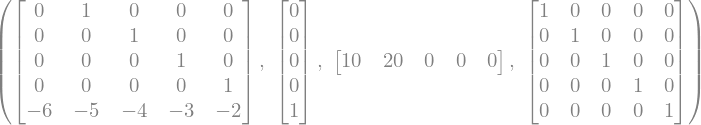

In [12]:
Asym,Bsym,Csym,Isym

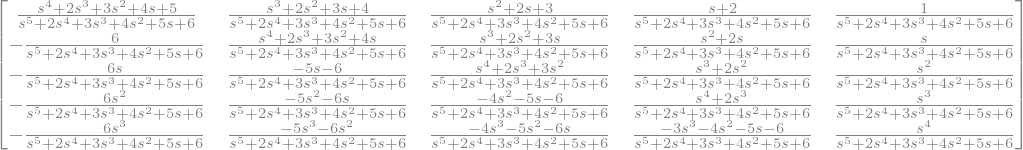

In [13]:
#Aのリゾルベント
resolvA = (s*Isym-Asym).inv()
resolvA

In [14]:
#resolvAの共通分母はAの特性多項式にほかならない
Asym.charpoly(s)

状態方程式から伝達関数への再変換

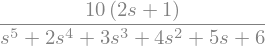

In [15]:
Gsym = (C*resolvA*B)[0]
Gsym = sp.simplify(Gsym)
Gsym

#### 例その２($m=n$の場合）

In [16]:
a0=5; a1=4; a2=3; a3=2
b0=10; b1=20; b2=30; b3=40; b4=50

In [17]:
num=[b4,b3,b2,b1,b0]
den=[1,a3,a2,a1,a0]
G=tf(num,den)

In [18]:
G

TransferFunction(array([50, 40, 30, 20, 10]), array([1, 2, 3, 4, 5]))

式(2.15)〜(2.20)に従って変換する

In [19]:
A = np.matrix([[0,1,0,0],
              [0,0,1,0],
              [0,0,0,1],
              [-a0,-a1,-a2,-a3]])
B = np.matrix([[0],[0],[0],[1]])
C = np.matrix([[b0-b4*a0, b1-b4*a1, b2-b4*a2, b3-b4*a3]])
D = np.matrix([b4])

検算してみよう．

In [20]:
Asym=sp.Matrix(A)
Bsym=sp.Matrix(B)
Csym=sp.Matrix(C)
Dsym=sp.Matrix(D)

In [21]:
I=np.eye(4).astype(np.int32) 
Isym=sp.Matrix(I)

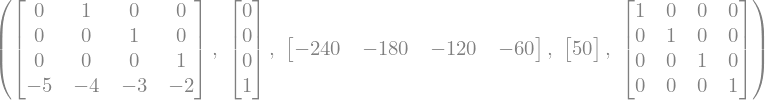

In [22]:
Asym,Bsym,Csym,Dsym,Isym

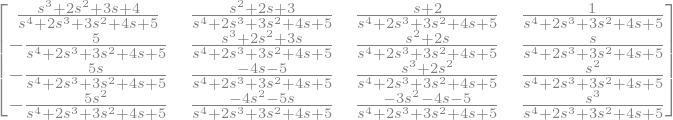

In [23]:
#Aのリゾルベント
resolvA = (s*I-Asym).inv()
resolvA

状態方程式から伝達関数への再変換

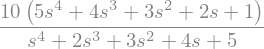

In [24]:
Gsym = (C*resolvA*B+D)[0]
Gsym = sp.factor(Gsym)
Gsym

## 章末問題

### 【１】 常微分方程式の解をLaplace変換を用いて求める．


In [25]:
t = sp.symbols('t')

(1)の解答

In [26]:
Y=(s+4)/(s**2 + 4*s + 3)

逆ラプラス変換して$y(t)$を得る．（$\theta(t)$は単位ステップ関数.1に読み替えればOK）

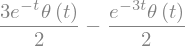

In [27]:
y=sp.inverse_laplace_transform(Y, s, t)
sp.expand(y)

(2)の解答

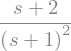

In [28]:
Y=(s+2)/((s+1)**2)
Y

In [29]:
y=sp.inverse_laplace_transform(Y, s, t)
sp.expand(y)